# Week5 - Lab

* Assign X, y
* Train-test split
* Visualize & speculate on training dataset
* Train a logistic regression model
* Evaluate the model, roc score
* Explain findings

## This lab work is in collaboration of AYUSHI BHUJADE and JAINAM MAHESHKUMAR PATEL

In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

<Axes: >

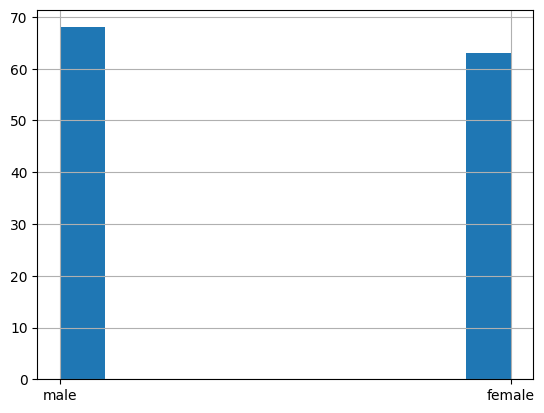

In [111]:
df.Gender.hist()

In [112]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


In [113]:
# sns.pairplot(df, hue='Gender')

In [114]:
df.columns
df["Gender"].value_counts()

# df.drop("Marital Status", axis=1)

male      68
female    63
Name: Gender, dtype: int64

In [115]:
#train test split

from sklearn.model_selection import train_test_split
x=df[["Age","Height (cm)","Weight (kg)","Income (USD)"]]
y= df[["Gender"]]

x_train, x_test, y_train, y_test =  train_test_split (x, y, test_size=0.2)

print ('total no. of samples: ', df.shape)
print ('no. of train samples: ', x_train.shape)
print ('no. of train samples: ', x_test.shape)
print ('no. of y train samples: ', y_train.shape)
print ('no. of y train samples: ', y_test.shape)

total no. of samples:  (131, 9)
no. of train samples:  (104, 4)
no. of train samples:  (27, 4)
no. of y train samples:  (104, 1)
no. of y train samples:  (27, 1)


In [116]:
#train logistic regression model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train, y_train)
LR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [117]:
#prediction
yhat=LR.predict(x_test)
yhat_prob= LR.predict_proba(x_test)

In [118]:
#evaluation using confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, yhat))
print (classification_report(y_test, yhat))
print("f1 score: ",f1_score(y_test, yhat, average='weighted') )


[[13  0]
 [ 0 14]]
              precision    recall  f1-score   support

      female       1.00      1.00      1.00        13
        male       1.00      1.00      1.00        14

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

f1 score:  1.0


In [119]:
#calculating AUC
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, yhat_prob[:,1])
auc_score1


1.0